Imports:

In [1]:
import numpy as np
import pandas as pd  
import data_cleaning_for_EDA as dc 
import matplotlib.pyplot as plt
import seaborn as sns
import imputing_methods as im

Read in data: 

In [2]:
def parse_to_datetime_mo_yr(date_str):
    return pd.to_datetime(date_str, format='%b-%Y', errors='coerce') #%b is for month name, and %m is for month number. Ugh. 

# Reading in the csv and parsing dates. 
finance_df = pd.read_csv(
    "dataframe.csv",
    parse_dates=['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'],
    date_format='%m-%Y',
    converters={'issue_date': parse_to_datetime_mo_yr, 
                'earliest_credit_line': parse_to_datetime_mo_yr,
                'last_payment_date': parse_to_datetime_mo_yr,
                'next_payment_date': parse_to_datetime_mo_yr,
                'last_credit_pull_date': parse_to_datetime_mo_yr}
)
# Cleaning up lengths of time that could be treated as floats. 
finance_df['employment_length'] = finance_df['employment_length'].str.extract(r"([-+]?\d*\.\d+|[-+]?\d+)").astype(float)
finance_df['term'] = finance_df['term'].str.extract(r"([-+]?\d*\.\d+|[-+]?\d+)").astype(float)
finance_df.rename(columns = {'employment_length':'years_of_employment', 'term' : 'term_length_in_months'}, inplace = True) 
# Cleaning up object type columns- all of which are suitable for category (I checked).
columns_to_cat = ['grade', 'sub_grade', 'verification_status', 'home_ownership', 'loan_status', 'payment_plan', 'purpose', 'application_type']
finance_df[columns_to_cat] = finance_df[columns_to_cat].astype('category')

Allowing my data frame to inherit any classes I've created and want to use: 

In [16]:
class MultipleInheritanceTestClass(im.Plotter, im.DataFrameTransform, dc.DataFrameInfo):
    pass

df = MultipleInheritanceTestClass(finance_df)

Main Workspace: 

In [17]:
# Before: 
df.perc_null()

Unnamed: 0                      0.000000
id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term_length_in_months           8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
years_of_employment             3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_

In [18]:

df.drop_weak_columns() 

df.perc_null()

# deciding which (if any) columns have too many NULLs: 

# df.print_shape() # again, it's (54231, 44)

# df.perc_null() # suspiciously, all my parsed date columns are reading as 100% null. 
        # other high-null columns: months_since_last_major_derog 86% mths_since_last_deling 57% mths_since_last_record 88% 

# finance_df['next_payment_date'].head(10) #now that works. 

# df.tabulate_and_export('issue_date', 'issue_date_tabulated.csv')

# df.plot_column('issue_date') # Late 2009 looks very popular. 

# df.col_names()

# df.plot_column('home_ownership') # unsupported data type

# df.data_types() 

Unnamed: 0                    0.000000
id                            0.000000
member_id                     0.000000
loan_amount                   0.000000
funded_amount                 5.544799
funded_amount_inv             0.000000
term_length_in_months         8.799395
int_rate                      9.531449
instalment                    0.000000
grade                         0.000000
sub_grade                     0.000000
years_of_employment           3.905515
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_date                    0.000000
loan_status                   0.000000
payment_plan                  0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_credit_line          0.000000
inq_last_6mths                0.000000
open_accounts                 0.000000
total_accounts                0.000000
out_prncp                

Decide whether the column should be imputed with median or mean: 

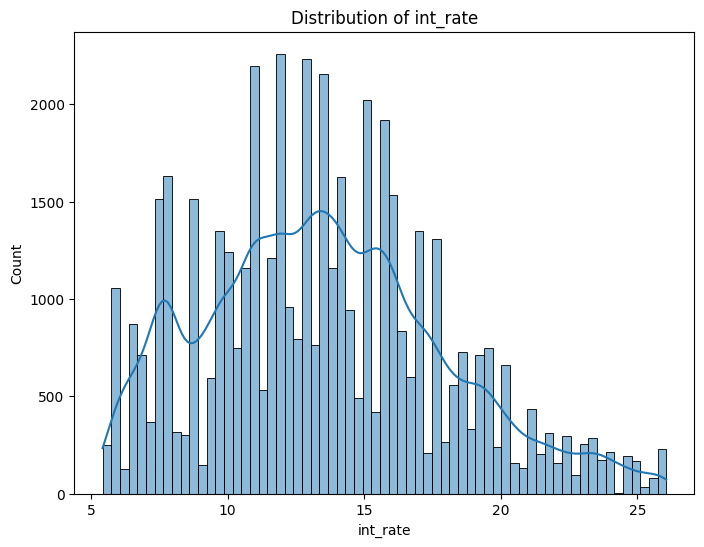

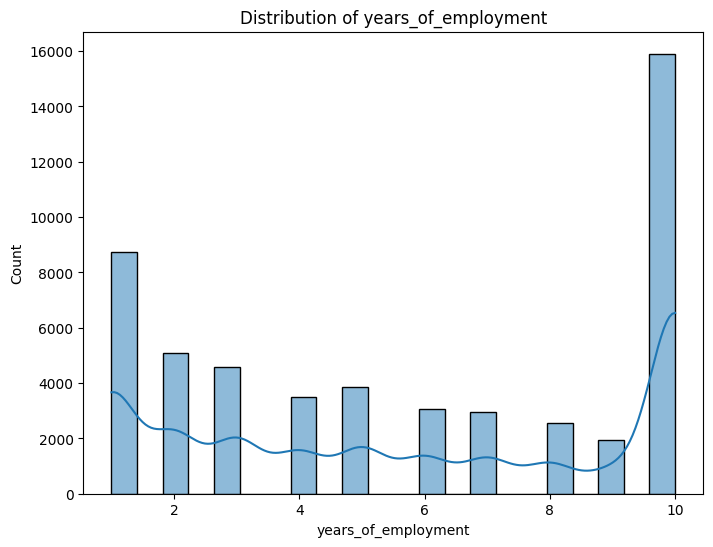

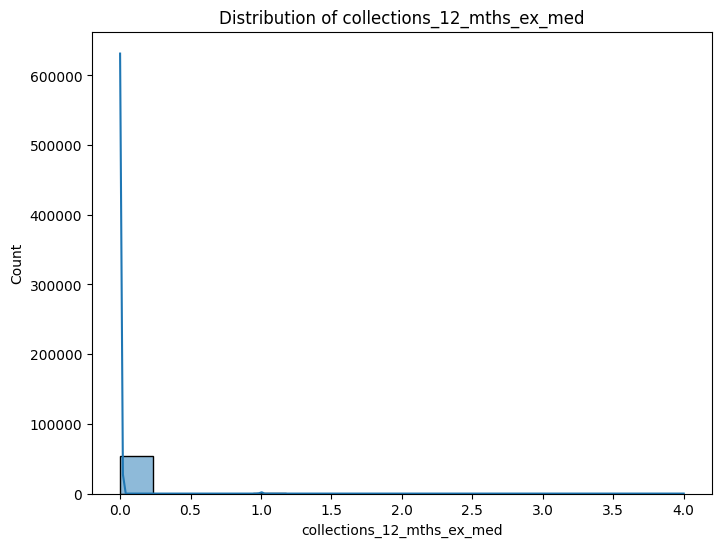

In [6]:
#I ran plots for all five of the non-zero percentage null columns, but I kept pressing shift+enter so moved on with my life; you can see three here and run the other three yourself if you want. 
df.plot_column("int_rate")
df.plot_column("years_of_employment")
df.plot_column("collections_12_mths_ex_med")
#they're all skewed so all median imputes

Impute null values:

In [19]:
df.impute_null_values()
df.perc_null() # All 0s now, as should be. 

Unnamed: 0                    0.0
id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term_length_in_months         0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
years_of_employment           0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0
total_rec_prnc

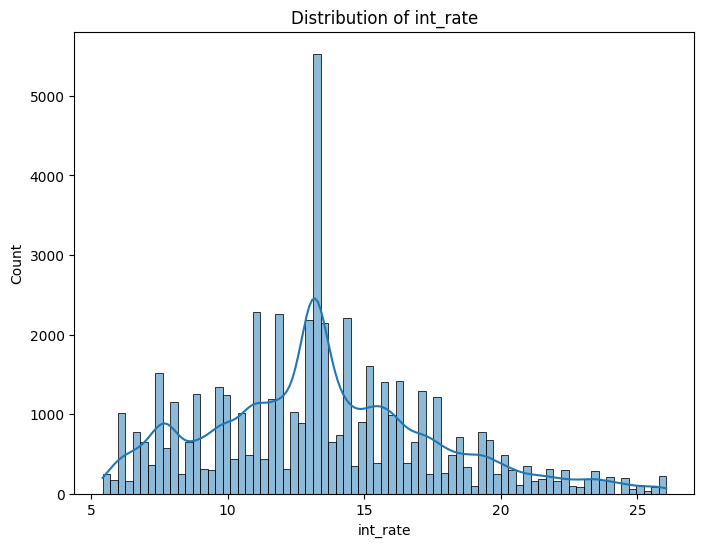

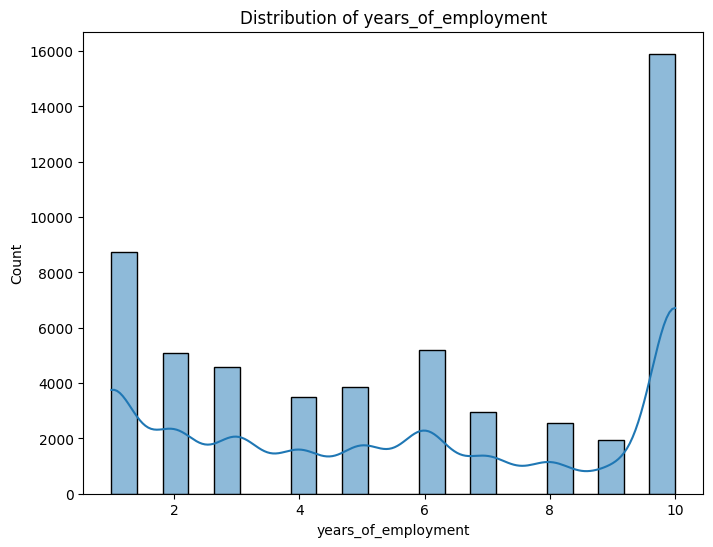

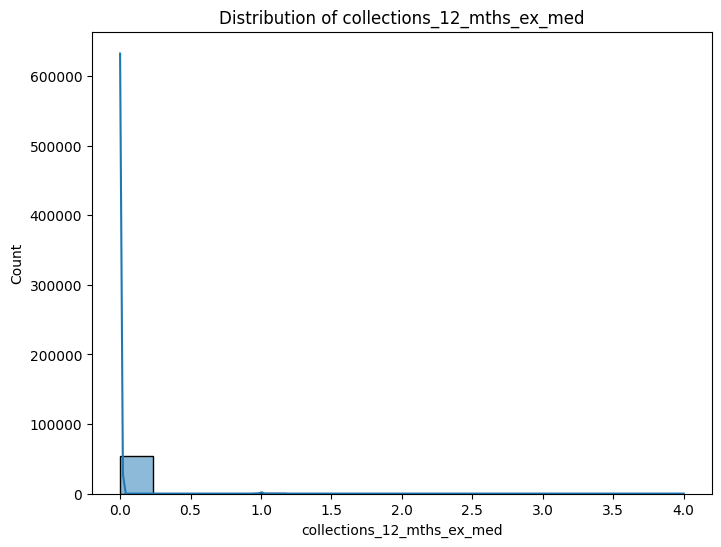

In [8]:
#visualise the removal of null values with another plot: 
df.plot_column("int_rate")
df.plot_column("years_of_employment")
df.plot_column("collections_12_mths_ex_med")
#As expected, now major spikes at point of median-- this would increase kurtosis. 

Task 4: Dealing with Skew. 

Step 1: Identify skewed columns in data using Pandas methods; determine a threshold for skewness. 

In [15]:
finance_df.skew(numeric_only=True)


Unnamed: 0                      0.000000
id                              2.370336
member_id                       2.205422
loan_amount                     0.805259
funded_amount                   0.821787
funded_amount_inv               0.813927
term_length_in_months           1.006387
int_rate                        0.412032
instalment                      0.996981
years_of_employment            -0.030888
annual_inc                      8.711831
dti                             0.189420
delinq_2yrs                     5.370002
inq_last_6mths                  3.248918
mths_since_last_delinq          0.438109
mths_since_last_record         -0.839995
open_accounts                   1.059282
total_accounts                  0.779014
out_prncp                       2.356426
out_prncp_inv                   2.356848
total_payment                   1.267891
total_payment_inv               1.256197
total_rec_prncp                 1.261015
total_rec_int                   2.204322
total_rec_late_f


Rule of thumb off the internet is a skew of abs val 1 is "uncomfortable." Let's see what those look like. 

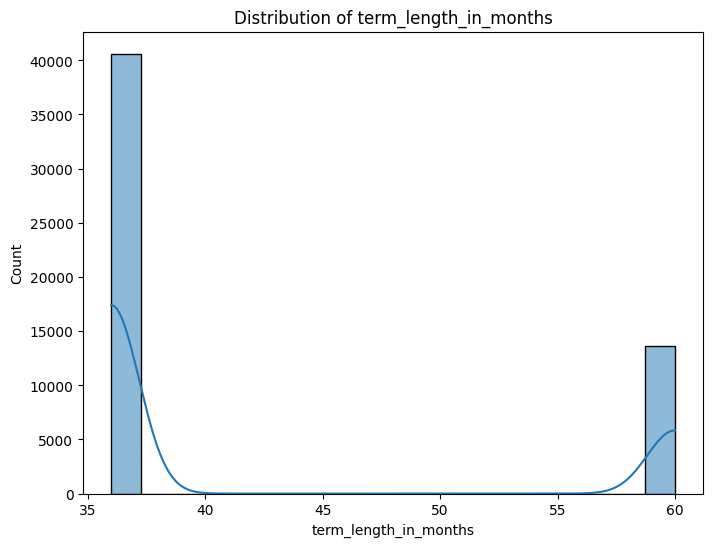

In [20]:
df.plot_column("term_length_in_months") #skew of 1 and this is the "binary" one I imputed with the median so it now has a ratio of about 8:3... pretty heavily skewed! 

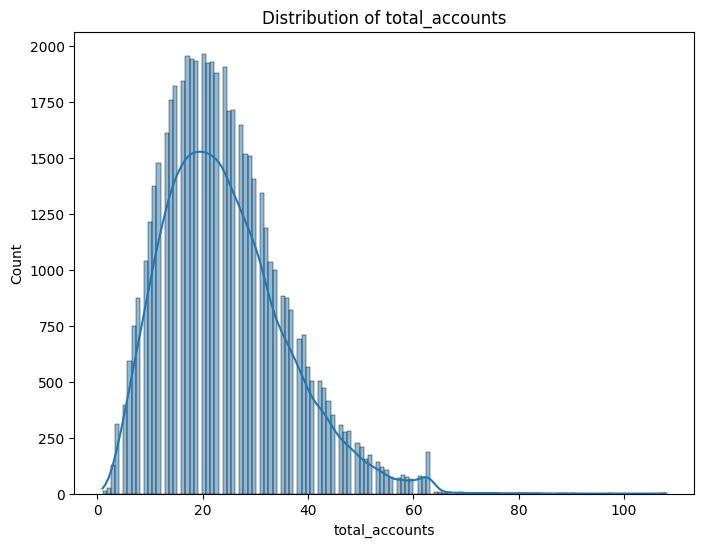

In [24]:
df.plot_column("total_accounts") # skewness of about 0.8 apparently. Looks like a Normal Distribution with just some extra tail on the top end. 

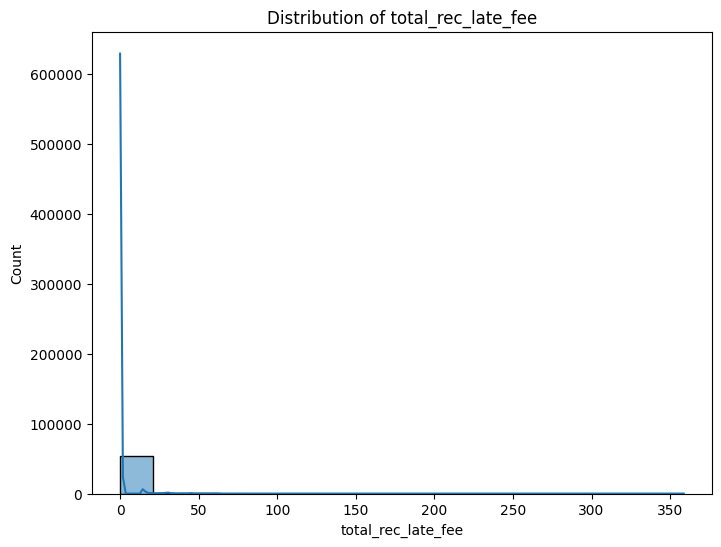

In [21]:
df.plot_column("total_rec_late_fee") #skewness of 13 - graph basically looks like it has just one outcome -- very skewed. 

I've created a high_skew_columns method in data_clening_for_EDA. It should give any columns with skew greater than 1.2 (default threshold). 

In [31]:
print((df.high_skew_columns()).data_types(), df.high_skew_columns())

AttributeError: 'MultipleInheritanceTestClass' object has no attribute 'high_skew_columns'